# Source

Data downloaded from here: https://data.gesis.org/tweetscov19/#dataset

Data should be stored in `./data`

Coulmn Names:
1. Tweet Id: Long. - NOT USED
2. Username: String. Encrypted for privacy issues. - NOT USED

3. Timestamp: Format ( "EEE MMM dd HH:mm:ss Z yyyy" ). ISOString => integer (e.g. 23517957).

4. #Followers: Integer.
5. #Friends: Integer.
6. #Retweets: Integer.
7. #Favorites: Integer.

8. Entities: String. For each entity, we aggregated the original text, the annotated entity and the produced score from FEL library. Each entity is separated from another entity by char ";". Also, each entity is separated by char ":" in order to store "original_text:annotated_entity:score;". If FEL did not find any entities, we have stored "null;".
9. Sentiment: String. SentiStrength produces a score for positive (1 to 5) and negative (-1 to -5) sentiment. We splitted these two numbers by whitespace char " ". Positive sentiment was stored first and then negative sentiment (i.e. "2 -1").

10. Mentions: String. If the tweet contains mentions, we remove the char "@" and concatenate the mentions with whitespace char " ". If no mentions appear, we have stored "null;".
11. Hashtags: String. If the tweet contains hashtags, we remove the char "#" and concatenate the hashtags with whitespace char " ". If no hashtags appear, we have stored "null;".
dwenate the URLs using ":-: ". If no URLs appear, we have stored "null;"

In [1]:
# imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_pickle("./data/test_data_processed_WITH_USERNAME.pkl")

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,Username,Hashtag Emb0,Hashtag Emb1,Hashtag Emb2,Hashtag Emb3,Hashtag Emb4,Hashtag Emb5,Hashtag Emb6,Hashtag Emb7,Hashtag Emb8,Hashtag Emb9,Hashtag Emb10,Hashtag Emb11,Hashtag Emb12,Hashtag Emb13,Hashtag Emb14,Hashtag Emb15,Hashtag Emb16,Hashtag Emb17,Hashtag Emb18,Hashtag Emb19,Hashtag Emb20,Hashtag Emb21,Hashtag Emb22,Hashtag Emb23,Hashtag Emb24,Mention Emb0,Mention Emb1,Mention Emb2,Mention Emb3,Mention Emb4,Mention Emb5,Mention Emb6,Mention Emb7,Mention Emb8,Mention Emb9,Mention Emb10,Mention Emb11,Mention Emb12,Mention Emb13,Mention Emb14,Mention Emb15,Mention Emb16,Mention Emb17,Mention Emb18,Mention Emb19,Mention Emb20,Mention Emb21,Mention Emb22,Mention Emb23,Mention Emb24,scaled_Positive,scaled_Negative,scaled_Sentiment Disparity,log_#Retweets,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7
0,fa5fd446e778da0acba3504aeab23da5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,4.472727,4.380953,0.000000,0.000000,7.623076,0,0,0,0,1,0,0
1,547501e9cc84b8148ae1b8bde04157a4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.698970,2.903090,3.106871,0.000000,0.845098,7.623078,0,0,0,0,1,0,0
2,840ac60dab55f6b212dc02dcbe5dfbd6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,0.301030,2.768638,2.578639,0.000000,0.477121,7.623078,0,0,0,0,1,0,0
3,37c68a001198b5efd4a21e2b68a0c9bc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,2.376577,2.227887,0.000000,0.000000,7.623079,0,0,0,0,1,0,0
4,8c3620bdfb9d2a1acfdf2412c9b34e06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.5,0.000000,2.627366,2.631444,0.477121,0.000000,7.623079,0,0,0,0,1,0,0
5,491a98bbc105806cb67f46f5e3f3d888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,0.6,0.000000,1.724276,1.672098,0.602060,0.000000,7.623080,0,0,0,0,1,0,0
6,916dec763c84916c929bb257ff96187d,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.5,2.330414,4.846250,4.026370,0.6

In [4]:
len(data)

1912070

In [6]:
df = data.sample(n=200000)

In [7]:
df.to_pickle("./data/test_mil.pkl")
df.head(100)

,Username,Hashtag Emb0,Hashtag Emb1,Hashtag Emb2,Hashtag Emb3,Hashtag Emb4,Hashtag Emb5,Hashtag Emb6,Hashtag Emb7,Hashtag Emb8,Hashtag Emb9,Hashtag Emb10,Hashtag Emb11,Hashtag Emb12,Hashtag Emb13,Hashtag Emb14,Hashtag Emb15,Hashtag Emb16,Hashtag Emb17,Hashtag Emb18,Hashtag Emb19,Hashtag Emb20,Hashtag Emb21,Hashtag Emb22,Hashtag Emb23,Hashtag Emb24,Mention Emb0,Mention Emb1,Mention Emb2,Mention Emb3,Mention Emb4,Mention Emb5,Mention Emb6,Mention Emb7,Mention Emb8,Mention Emb9,Mention Emb10,Mention Emb11,Mention Emb12,Mention Emb13,Mention Emb14,Mention Emb15,Mention Emb16,Mention Emb17,Mention Emb18,Mention Emb19,Mention Emb20,Mention Emb21,Mention Emb22,Mention Emb23,Mention Emb24,scaled_Positive,scaled_Negative,scaled_Sentiment Disparity,log_#Retweets,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7
1317152,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.845098,6.059872,2.653213,0.000000,1.204120,7.635820,0,0,0,0,0,1,0
1757961,2b5da179e087e6225fb48629bd82a636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.5,0.477121,2.380211,2.338456,0.477121,0.602060,7.629350,0,0,0,0,1,0,0
448277,d5001f067840a30654333afd1f43cdb1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,2.190332,0.000000,0.602060,0.000000,7.638859,0,1,0,0,0,0,0
1021253,f40ccccb8a620ef97196ac729a8e508d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.4,0.000000,1.857332,2.838849,0.301030,0.000000,7.645892,0,0,0,1,0,0,0
442539,3989c8181b07ea0e8c236b9a848edef6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,2.810233,2.498311,0.301030,0.000000,7.628304,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849615,65093523391bb5b3cbe3f7b83096d584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.2,0.4,1.505150,2.436163,2.544068,0.477121,2.646404,7.645300,0,0,1,0,0,0,0
617293,90505153d643b6b405679c3914f97191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.5,0.954243,3.074085,3.303628,0.602060,1.653213,7.636035,0,0,0,0,0,1,0
165727,c5cf9219465bba0015beed9562e61fdd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,3.516535,2.848189,0.301030,0.000000,7.637793,1,0,0,0,0,0,0
441953,d905a0a0ea1660a80eac7fab158fd33f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [11]:
# use the whole training data for this

def find_user_stats(path):
    # Load raw data
    data=pd.read_pickle(path)

    # Number of unique users
    print(data['Username'].nunique())

    # Group by users
    df=data.groupby('Username')[['#Followers', '#Friends', '#Retweets', '#Favorites']]
    
    # Get minimum
    df_min=df.min()
    df_min.rename(columns=lambda x: x + "_min", inplace=True)
    
    # Get maximum
    df_max=df.max()
    df_max.rename(columns=lambda x: x + "_max", inplace=True)
        
    # Get mean
    df_mean=df.mean()
    df_mean.rename(columns=lambda x: x + "_mean", inplace=True)
        
    # Save pickle and return dataframe
    df=pd.concat([df_min, df_max, df_mean], axis=1)
    df.to_pickle('user-stats.pkl')
    return df

In [18]:
userstats = pd.read_pickle("./data/user-stats.pkl")

In [22]:
userstats.head()

,#Followers_min,#Friends_min,#Retweets_min,#Favorites_min,#Followers_max,#Friends_max,#Retweets_max,#Favorites_max,#Followers_mean,#Friends_mean,#Retweets_mean,#Favorites_mean
Username,,,,,,,,,,,,
000000e6bded7cdeaffee6928df45050,1658,23,2,4,1658,23,2,4,1658.0,23.0,2.0,4.0
0000048f8bdf58d9d5afa27556390261,1709,1667,0,0,1799,1763,1,1,1754.0,1715.0,0.5,0.5
000006f5da1c240d29783090cdf4366a,70,48,0,0,70,48,0,0,70.0,48.0,0.0,0.0
000007c67e0127cc429b0f2730e72469,13,28,0,0,13,28,0,0,13.0,28.0,0.0,0.0
00000c337b7f0b2c04c48042743d7c6b,112,27,0,0,145,28,0,0,128.5,27.5,0.0,0.0


In [5]:
def scaledtransform(dataframe, cols):
    for col,m in cols:
        dataframe["scaled_" + col ] = dataframe[col].apply(lambda x: x/m)
        dataframe = dataframe.drop(col,1)
    return dataframe


def logtransform(dataframe,cols):
    for col in cols:
        dataframe["log_" + col ] = dataframe[col].apply(lambda x: np.log10(int(x)+1))
        dataframe = dataframe.drop(col,1)
    return dataframe

def ohetransform(dataframe, cols):
    for col in cols:
        one_hot = pd.get_dummies(dataframe[col])
        dataframe["ohe_" + col ] = one_hot.values.tolist()
        dataframe = dataframe.drop(col,1)
    return dataframe

def unpackcol(dataframe,cols):
    for col in cols:
        unpacked = pd.DataFrame(df[col].tolist(), columns=[f'{col}_{idx + 1}' for idx in range(len(df[col].values[0]))], index= dataframe.index)
        dataframe = dataframe.drop(col,axis=1)
        dataframe = pd.concat([dataframe, unpacked], axis=1, join='inner')
    return dataframe

In [164]:
df=scaledtransform(data,[("Positive",5),("Negative",-5), ("Sentiment Disparity",10)])
df=logtransform(df,["#Retweets","#Followers", "#Friends", "No. of Entities","#Favorites", "Time Int"])
df = ohetransform(df, ["Day of Week"])
df = unpackcol(df,["Mention Embedding", "Hashtag Embedding", "ohe_Day of Week"])
df = df.drop(["Month","Username"],1)
df.to_pickle("./data/processed.pkl")


In [16]:
df

,#Retweets,Positive,Negative,Sentiment Disparity,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,Mention Embedding_1,...,Hashtag Embedding_23,Hashtag Embedding_24,Hashtag Embedding_25,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7
6537502,35,3,-1,4,4.889509,1.643453,0.698970,2.429752,7.616132,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0
624718,25,1,-1,2,4.161068,3.911584,0.000000,1.732394,7.443045,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
4230029,16,2,-2,4,5.310644,4.384389,0.301030,2.136721,7.574251,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
3065452,55,1,-1,2,3.298853,3.654946,0.301030,2.201397,7.582719,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
109411,0,1,-3,4,2.600973,2.460898,0.301030,0.000000,7.412219,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213428,0,2,-1,3,3.019947,3.005609,0.301030,0.000000,7.604276,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
7398631,21,3,-2,5,4.590084,3.372175,0.602060,1.531479,7.599177,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
3275890,6,1,-1,2,2.865104,2.260071,0.000000,1.113943,7.585136,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
7649920,0,3,-1,4,3.649724,3.696182,0.477121,0.000000,7.603829,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='#Retweets', ylabel='Count'>

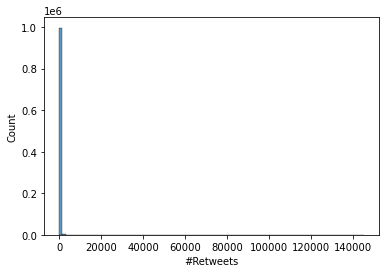

In [17]:
sns.histplot(data=df, x="#Retweets", bins=100)

In [9]:
sorted_by_retweets = data.sort_values(by='#Retweets', ascending=False)
sorted_by_retweets.head(100)


,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1637862,1265465820995411973,0d4d9b3135ab4271ea36f4ebf8e9eae9,Wed May 27 02:12:17 +0000 2020,3317,3524,257467,845579,tear gas:Tear_gas:-1.688018296396458;,1 -1,null;,null;,null;
1208647,1266553959973445639,c9378a990def5939fb179e034a0d402e,Sat May 30 02:16:10 +0000 2020,18661,0,135818,363852,null;,1 -3,null;,null;,null;
1328169,1258750892448387074,1921c65230cd080c689dc82ea62e6e74,Fri May 08 13:29:33 +0000 2020,83320,1753,88667,224288,mike pence:Mike_Pence:-0.6712149436851893;ppe:...,1 -1,null;,null;,null;
1736035,1263579286201446400,7c4529bc4da01f288b95cd3876b4da47,Thu May 21 21:15:52 +0000 2020,451,359,82495,225014,null;,1 -1,null;,null;,null;
751238,1266546753182056453,32634ab407c86a56dde59551b3871c42,Sat May 30 01:47:31 +0000 2020,1545,874,66604,193599,douche:Douche:-2.0041883604919835;,3 -1,null;,null;,null;
...,...,...,...,...,...,...,...,...,...,...,...,...
407941,1264737293249794048,75224fc65ae453fe9ec3ca855cd8619b,Mon May 25 01:57:23 +0000 2020,80242531,46,25660,99272,null;,3 -1,null;,null;,null;
822506,1266335781775380480,bf4571b94429c5b18e0a219c197a56a4,Fri May 29 11:49:12 +0000 2020,6136949,28,25210,57242,covid 19:Coronavirus_disease_2019:-1.535776454...,1 -3,null;,null;,http://news.sky.com/story/coronavirus-monkeys-...
586930,1258537649368739840,f5636375bb151085d00b0d09e86e53b1,Thu May 07 23:22:12 +0000 2020,1571,639,24815,41715,null;,1 -1,gmpolice,null;,null;
492759,1263613225146482694,dcc2b63414b7da0eb620f046394b4116,Thu May 21 23:30:44 +0000 2020,724986,13034,24791,180780,twitter:Twitter:-1.1708686827892931;,1 -1,null;,null;,null;


Sad life. Apparently, most high retweets have no mentions and hashtags... T.T my work is useless honestly.

In [10]:
total_retweets = sorted_by_retweets['#Retweets'].sum()

In [11]:
# sorted_by_retweets['#Retweets'] = sorted_by_retweets['#Retweets'].apply(lambda x: x / total_retweets).cumsum()
# sorted_by_retweets[sorted_by_retweets['#Retweets'] < 0.1]

In [18]:
df1 = data[['#Followers','#Friends','#Retweets','#Favorites']]
df1

,#Followers,#Friends,#Retweets,#Favorites
0,29697,24040,0,0
1,799,1278,4,6
2,586,378,1,2
3,237,168,0,0
4,423,427,0,0
...,...,...,...,...
1912065,15,45,0,0
1912066,43,931,0,0
1912067,256,451,0,0
1912068,1467,1505,0,0


<AxesSubplot:>

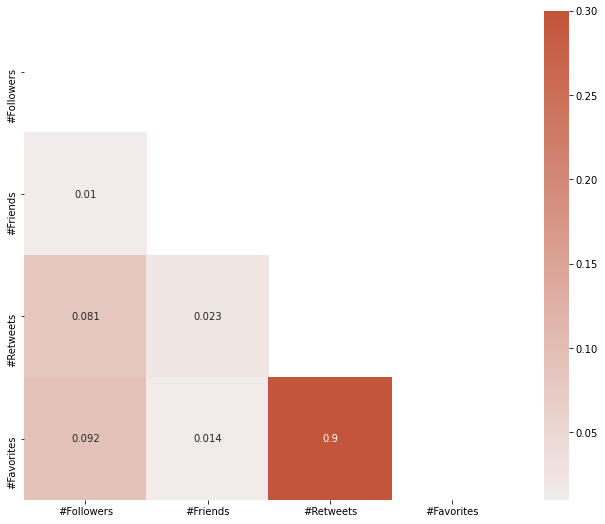

In [24]:
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df1.corr(), annot=True, mask=mask, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0, square=True)

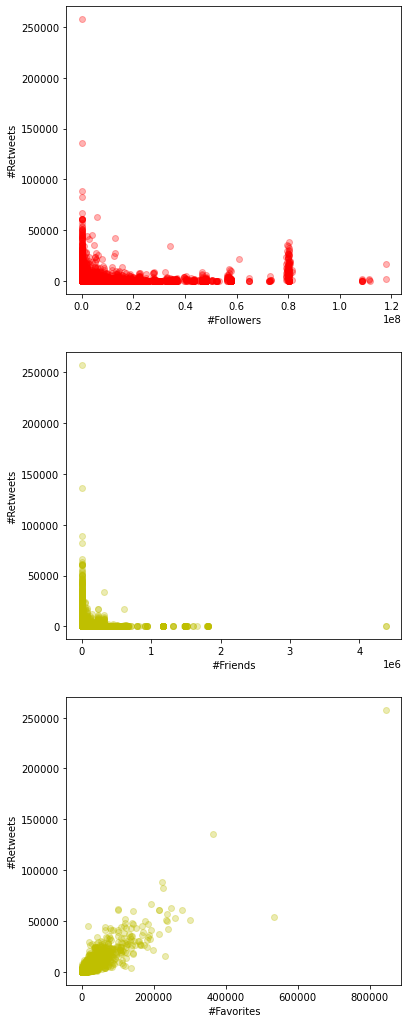

In [23]:
def plotter(data, target_col):
    column_list = list(data.columns)
    column_list.remove(target_col)
    len_col = len(column_list) #length of list of all the dependent variables
    fig, axes = plt.subplots(len_col, figsize = (6, 6 * len_col)) #Creating a plot with subplots for each independant variable
    for col, ax in zip(column_list, axes): #The for loop goes through zipped list of column names and subplot and plots each plot
        ax.scatter(data[col], data[target_col], alpha = 0.3, c = np.random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k']))
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        

plotter(df1, '#Retweets')

In [5]:
# data = pd.read_pickle("./data/user-stats.pkl")
pd.set_option('display.max_columns', None)
lookup

,#Followers_min,#Friends_min,#Retweets_min,#Favorites_min,#Followers_max,#Friends_max,#Retweets_max,#Favorites_max,#Followers_mean,#Friends_mean,#Retweets_mean,#Favorites_mean
Username,,,,,,,,,,,,
000000e6bded7cdeaffee6928df45050,1658.0,23.0,2.0,4.0,1658.0,23.0,2.0,4.0,1658.000000,23.000000,2.0,4.000000
0000048f8bdf58d9d5afa27556390261,1709.0,1667.0,0.0,0.0,1799.0,1763.0,1.0,1.0,1754.000000,1715.000000,0.5,0.500000
000006f5da1c240d29783090cdf4366a,70.0,48.0,0.0,0.0,70.0,48.0,0.0,0.0,70.000000,48.000000,0.0,0.000000
000007c67e0127cc429b0f2730e72469,13.0,28.0,0.0,0.0,13.0,28.0,0.0,0.0,13.000000,28.000000,0.0,0.000000
00000c337b7f0b2c04c48042743d7c6b,112.0,27.0,0.0,0.0,145.0,28.0,0.0,0.0,128.500000,27.500000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
ffffe3a40702275daef6c1e947f1e884,147.0,618.0,0.0,0.0,250.0,644.0,8.0,23.0,207.666667,630.333333,3.0,7.666667
ffffeca2c4676546be82c9bf9df9c322,199.0,345.0,2.0,1.0,199.0,345.0,2.0,1.0,199.000000,345.000000,2.0,1.000000
ffffefd798b5015ad33978b75d469efa,317.0,430.0,0.0,0.0,317.0,430.0,0.0,0.0,317.000000,430.000000,0.0,0.000000


In [9]:
data['label']= data['log_#Retweets'].apply(lambda x: float(0) if x==float(0) else float(1))
data

,Hashtag Emb0,Hashtag Emb1,Hashtag Emb2,Hashtag Emb3,Hashtag Emb4,Hashtag Emb5,Hashtag Emb6,Hashtag Emb7,Hashtag Emb8,Hashtag Emb9,Hashtag Emb10,Hashtag Emb11,Hashtag Emb12,Hashtag Emb13,Hashtag Emb14,Hashtag Emb15,Hashtag Emb16,Hashtag Emb17,Hashtag Emb18,Hashtag Emb19,Hashtag Emb20,Hashtag Emb21,Hashtag Emb22,Hashtag Emb23,Hashtag Emb24,Mention Emb0,Mention Emb1,Mention Emb2,Mention Emb3,Mention Emb4,Mention Emb5,Mention Emb6,Mention Emb7,Mention Emb8,Mention Emb9,Mention Emb10,Mention Emb11,Mention Emb12,Mention Emb13,Mention Emb14,Mention Emb15,Mention Emb16,Mention Emb17,Mention Emb18,Mention Emb19,Mention Emb20,Mention Emb21,Mention Emb22,Mention Emb23,Mention Emb24,scaled_Positive,scaled_Negative,scaled_Sentiment Disparity,log_#Retweets,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7,label
7729226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,0.477121,3.434249,2.432969,0.301030,0.954243,7.620912,0,0,1,0,0,0,0,1.0
7723456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,1.505150,6.072367,3.354108,0.301030,1.255273,7.617253,0,0,0,0,0,1,0,1.0
7208044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,1.079181,3.817764,2.354108,0.000000,1.113943,7.601536,0,0,1,0,0,0,0,1.0
7829457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,0.6,0.000000,0.778151,1.079181,0.477121,0.000000,7.621126,0,0,1,0,0,0,0,0.0
6708428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,1.623249,1.602060,0.301030,0.000000,7.600723,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.5,0.954243,4.840012,3.967314,0.000000,1.342423,7.591439,0,0,0,0,0,1,0,1.0
3140943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
class LogReg(nn.Module):
    def __init__(self, num_feature, num_class):
        super(LogReg, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return 


In [ ]:
num_feature = 3
num_class = 3
learning_rate = 0.0007

model = LogReg(num_feature, num_class)

if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 50
for e in trange(num_epochs):
    batch_losses = []
    for i, (Xb, yb) in enumerate(train_dl):
        _X = Variable(Xb.cuda())
        _y = Variable(yb.type(torch.LongTensor).cuda())
        preds = model(_X)
        loss = criterion(preds, _y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_losses.append(loss.item())

    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    
    if e % 5 == 0:
        print("Epoch [{}/{}], Batch loss: {}".format(e, num_epochs, mbl))


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

class CreateDataset(Dataset):
    def __init__(self, datapath, lookuppath=None, savepath=None, limit=None):
        data = pd.read_pickle(datapath)
        if lookuppath:
            lookup = pd.read_pickle(lookuppath)
            data = data.merge(lookup, how='inner', on='Username')
        self.y = torch.from_numpy(data[['log_#Retweets']].values)
        data['label']= data['log_#Retweets'].apply(lambda x: float(0) if x==float(0) else float(1))
        if savepath:
            data.to_pickle(savepath)
        data=data.drop(["log_#Retweets","Username"], 1)
        self.X = torch.from_numpy(data.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [26]:
train_dataset=CreateDataset("./data/mil.pkl","./data/user-stats.pkl", "./data/77train.pkl")
test_dataset=CreateDataset("./data/test_mil.pkl","./data/user-stats.pkl", "./data/77test.pkl")

In [29]:
pd.read_pickle("./data/77test.pkl")

,Username,Hashtag Emb0,Hashtag Emb1,Hashtag Emb2,Hashtag Emb3,Hashtag Emb4,Hashtag Emb5,Hashtag Emb6,Hashtag Emb7,Hashtag Emb8,Hashtag Emb9,Hashtag Emb10,Hashtag Emb11,Hashtag Emb12,Hashtag Emb13,Hashtag Emb14,Hashtag Emb15,Hashtag Emb16,Hashtag Emb17,Hashtag Emb18,Hashtag Emb19,Hashtag Emb20,Hashtag Emb21,Hashtag Emb22,Hashtag Emb23,Hashtag Emb24,Mention Emb0,Mention Emb1,Mention Emb2,Mention Emb3,Mention Emb4,Mention Emb5,Mention Emb6,Mention Emb7,Mention Emb8,Mention Emb9,Mention Emb10,Mention Emb11,Mention Emb12,Mention Emb13,Mention Emb14,Mention Emb15,Mention Emb16,Mention Emb17,Mention Emb18,Mention Emb19,Mention Emb20,Mention Emb21,Mention Emb22,Mention Emb23,Mention Emb24,scaled_Positive,scaled_Negative,scaled_Sentiment Disparity,log_#Retweets,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7,#Followers_min,#Friends_min,#Retweets_min,#Favorites_min,#Followers_max,#Friends_max,#Retweets_max,#Favorites_max,#Followers_mean,#Friends_mean,#Retweets_mean,#Favorites_mean,label
0,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.845098,6.059872,2.653213,0.000000,1.204120,7.635820,0,0,0,0,0,1,0,5.898849,2.654177,0.00000,0.0,6.045515,2.717671,2.936514,3.141763,5.998572,2.665512,1.231461,1.625194,1.0
1,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,1.079181,6.045585,2.653213,0.000000,1.397940,7.623376,0,0,0,0,0,1,0,5.898849,2.654177,0.00000,0.0,6.045515,2.717671,2.936514,3.141763,5.998572,2.665512,1.231461,1.625194,1.0
2,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.301030,6.052972,2.654177,0.698970,0.477121,7.628702,0,0,0,0,1,0,0,5.898849,2.654177,0.00000,0.0,6.045515,2.717671,2.936514,3.141763,5.998572,2.665512,1.231461,1.625194,1.0
3,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,1.230449,6.057853,2.653213,0.000000,1.612784,7.633294,0,0,1,0,0,0,0,5.898849,2.654177,0.00000,0.0,6.045515,2.717671,2.936514,3.141763,5.998572,2.665512,1.231461,1.625194,1.0
4,f830454b7d9b50ceee23204d18da083e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.602060,6.064940,2.654177,0.477121,0.698970,7.642592,0,0,0,0,0,0,1,5.898849,2.654177,0.00000,0.0,6.045515,2.717671,2.936514,3.141763,5.998572,2.665512,1.231461,1.625194,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124486,a61ee242e010dccbc81b651e36c240b0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.4,0.000000,3.121231,3.506099,0.477121,0.000000,7.641716,0,0,0,0,0,1,0,3.123525,3.502564,0.00000,0.0,3.123525,3.502564,0.000000,0.000000,3.123525,3.502564,0.000000,0.000000,0.0

In [27]:
print(len(train_dataset[0][0]))
print(len(test_dataset[0][0]))

78
78


In [30]:
# train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)], generator=torch.Generator().manual_seed(0))

# create a data loader for train and test sets
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [31]:
# simplest linear model
class LinReg(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out
    
# taken from torch regression example
class LinReg2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinReg2, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu_h1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, X):

        out = self.relu_h1(self.fc1(X))
        out = self.fc2(out)

        return out


In [32]:
input_size = 78
hidden_size = 32
output_size = 1
learningRate = 0.001 
from tqdm.notebook import trange

# model = LinReg(input_size, output_size)
model = LinReg2(input_size, hidden_size, output_size)

if torch.cuda.is_available():
    model.cuda()
    
criterion = nn.L1Loss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

num_epochs = 15
# stolen from https://gist.github.com/conormm/5b26a08029b900520bcd6fcd1f5712a0

for e in trange(num_epochs):
    batch_losses = []
    for i, (Xb, yb) in enumerate(train_dl):
        _X = Variable(Xb).cuda().float()
        _y = Variable(yb).cuda().float()
        preds = model(_X)
        loss = criterion(preds, _y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_losses.append(loss.item())

    mbl = np.mean(np.sqrt(batch_losses)).round(3)

    if e % 5 == 0:
        print("Epoch [{}/{}], Batch loss: {}".format(e, num_epochs, mbl))

Epoch [0/15], Batch loss: 0.32
Epoch [5/15], Batch loss: 0.236
Epoch [10/15], Batch loss: 0.231



In [33]:
from datetime import datetime

import torch

def save(model, fpath):
  now = datetime.now()
  timestamp = now.strftime("%d%m-%H%M")

  save_folder = './models'
  save_path = f'{save_folder}/{fpath}-{timestamp}'

  torch.save(model.state_dict(), save_path) # model is saved in save_folder for reproducibility
  print(f'Model saved in {save_path}.')
  return save_path

save(model,"77InpLinReg")

Model saved in ./models/77InpLinReg-0508-1614.


'./models/77InpLinReg-0508-1614'

In [34]:
import math
model.eval()
for _X, _y in test_dl:
    test_batch_losses = []
    _X = Variable(_X).cuda().float()
    _y = Variable(_y).cuda().float()

    #apply model
    test_preds = model(_X)
    test_loss = criterion(test_preds, _y)
    for i in range(100):
        print(math.floor(10**_y[i]-1),max(0,math.floor(10**test_preds[i].item())-1))
    break

6 7
10 10
1 1
16 16
3 2
3 1
9 10
1 2
5 6
2 5
6 6
10 8
6 8
5 4
19 16
30 27
7 13
4 6
22 16
0 0
0 0
0 0
0 0
0 0
2 0
1 0
13 27
273 226
477 612
75 77
4 3
219 171
70 164
142 377
436 483
449 323
148 45
34 23
0 0
642 522
216 240
167 187
0 0
1 1
21 22
0 0
0 0
54 107
0 0
0 0
0 0
2 1
1 1
0 0
3 6
4 4
15 21
233 209
53 56
0 0
103 91
208 188
19 27
2409 2165
213 252
1815 1077
105 120
200 222
2422 3842
428 543
885 502
493 333
537 622
202 235
2816 4252
15 20
129 71
65 39
594 719
507 380
125 104
960 677
469 281
363 264
656 439
101 134
271 136
6 2
996 1179
1193 1850
76 72
87 94
253 228
292 326
303 547
304 313
41 41
764 785
94 108
2360 2128


# XGBoost

In [27]:
data=pd.read_pickle("./data/data_processed.pkl")
data

,Hashtag Emb0,Hashtag Emb1,Hashtag Emb2,Hashtag Emb3,Hashtag Emb4,Hashtag Emb5,Hashtag Emb6,Hashtag Emb7,Hashtag Emb8,Hashtag Emb9,Hashtag Emb10,Hashtag Emb11,Hashtag Emb12,Hashtag Emb13,Hashtag Emb14,Hashtag Emb15,Hashtag Emb16,Hashtag Emb17,Hashtag Emb18,Hashtag Emb19,Hashtag Emb20,Hashtag Emb21,Hashtag Emb22,Hashtag Emb23,Hashtag Emb24,Mention Emb0,Mention Emb1,Mention Emb2,Mention Emb3,Mention Emb4,Mention Emb5,Mention Emb6,Mention Emb7,Mention Emb8,Mention Emb9,Mention Emb10,Mention Emb11,Mention Emb12,Mention Emb13,Mention Emb14,Mention Emb15,Mention Emb16,Mention Emb17,Mention Emb18,Mention Emb19,Mention Emb20,Mention Emb21,Mention Emb22,Mention Emb23,Mention Emb24,scaled_Positive,scaled_Negative,scaled_Sentiment Disparity,log_#Retweets,log_#Followers,log_#Friends,log_No. of Entities,log_#Favorites,log_Time Int,ohe_Day of Week_1,ohe_Day of Week_2,ohe_Day of Week_3,ohe_Day of Week_4,ohe_Day of Week_5,ohe_Day of Week_6,ohe_Day of Week_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,0.000000,2.792392,2.887054,0.000000,0.000000,7.372545,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.5,1.146128,4.560696,4.286569,0.477121,1.255273,7.372545,0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,0.000000,3.700617,3.286456,0.602060,0.000000,7.372551,0,1,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,0.000000,3.346353,2.987666,0.477121,0.000000,7.372559,0,1,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.3,1.431364,3.954725,3.694078,0.477121,1.954243,7.372573,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.000000,1.662758,2.374748,0.301030,0.000000,7.623069,0,0,0,0,1,0,0
8077790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.2,0.4,0.000000,0.778151,1.875061,0.000000,0.000000,7.623070,0,0,0,0,1,0,0
8077791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.5,1.591065,4.671987,3.694956,0.477121,2.100371,7.623070,0,0,0,0,1,0,0
8077792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.3,0.000000,4.338397,4.344589,0.698970,0.000000,7.623073,0,0,0,0,1,0,0


In [31]:
# df = logtransform(data, ["#Followers", "#Friends", "No. of Entities","#Favorites", "Time Int"])
# df = ohetransform(df, ["Day of Week"])
# df = unpackcol(df,["Mention Embedding", "Hashtag Embedding", "ohe_Day of Week"])
# df = df.drop(["Month","Username"],1)
labels=data["log_#Retweets"]
inputs=data.drop("log_#Retweets",1)

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


# create an xgboost regression model / can tune parameters
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=inputs,label=labels)
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.461735


In [35]:
for i in range(100):
    print(int(10**(preds[i])-1),int( 10**(y_test.values[i])-1))

0 0
4 16
1 0
3 14
0 0
1 0
0 0
0 0
0 0
1 0
3 3
3 3
0 0
0 0
10 152
1 0
0 0
0 0
7 14
1 0
0 0
4 36
3 2
0 0
0 0
0 0
3 14
16 293
1 0
10 80
0 0
0 0
2 2
4 16
1 0
0 0
1 0
0 0
0 0
0 0
7 107
0 0
2 1
1 0
0 0
0 0
1 0
1 0
14 78
1 1
3 8
1 0
11 116
1 2
0 0
5 31
0 0
16 126
33 998
0 0
1 1
4 8
1 0
2 6
1 0
2 2
2 3
1 2
3 16
6 58
0 0
15 117
1 0
1 0
0 0
1 0
7 15
0 0
1 0
3 5
1 0
8 37
1 0
0 0
1 0
0 0
0 0
1 0
5 5
1 0
1 0
0 0
0 0
5 26
0 0
0 0
4 11
15 74
8 28
1 1
